<a href="https://colab.research.google.com/github/Sriram192/Regression-ai1-fall2019/blob/New28_12_2020/lab_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [1]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [4]:
X.shape

(100, 1)

We are fitting a model with an intercept. Lets see what it is.

In [5]:
coef

array(80.88336208)

We can plot the data.

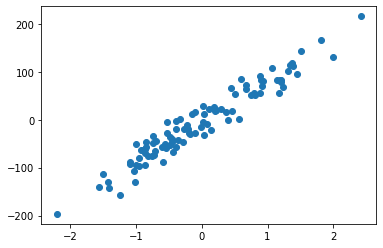

In [6]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [8]:
xgrid = np.linspace(-2.5,2.5,1000) #grid is a vector
Xgrid = xgrid.reshape(-1,1)#This reshape is to convert xgrid into a matrix. -1 fetches the las element of the array

In [9]:
xgrid.shape,Xgrid.shape

((1000,), (1000, 1))

In [16]:
vec = np.array([2,3,4,5,6,7,8,9])#defining a vector in python using numpy
vec2 = np.array([[2],
                 [3],
                 [4]]) #this creates a matrix of 3rows and 1 column
vec.shape, vec2.shape

((8,), (3, 1))

## Fit using sklearn

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([82.90456142]), -3.709228868670302)

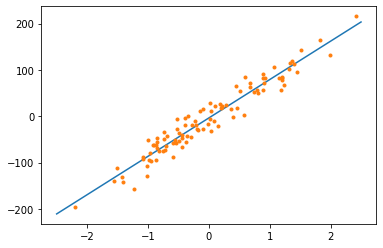

In [19]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y, lr.predict(X))

0.9342344891672815

In [24]:
lr.score(X,y)

0.9342344891672816

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [28]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([59,  9, 40,  7, 34, 59, 56, 72, 97, 35, 25, 28,  1,  0, 45, 24, 38,
        5, 26, 75])

In [29]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [30]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)

(0.9298584243108311, 0.9298584243108312)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0.7, 1.0)

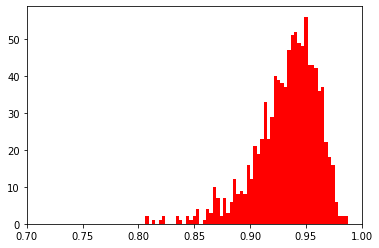

In [35]:
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    linreg = LinearRegression().fit(Xsample,ysample)
    scores.append(linreg.score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 100),color = 'red')
plt.xlim(0.7,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

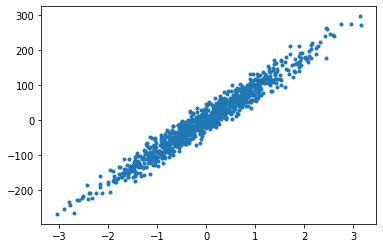

In [68]:
# your code here
X, y, coef = make_regression(n_samples = 1000, 
                       n_features=1, 
                       noise=20,
                       random_state=201,
                       coef=True)
plt.plot(X,y,'.')
plt.show()




0.9525931651485042

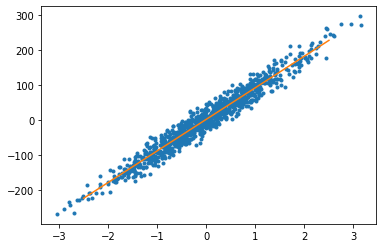

In [85]:
# your code here
lr = LinearRegression()
lr.fit(X,y)
xgrid = np.linspace(-2.5,2.5,1000) #grid is a vector
Xgrid = xgrid.reshape(-1,1)
ypred = lr.predict(Xgrid)
plt.plot(X,y,'.')
plt.plot(Xgrid,ypred)
lr.score(X,y)

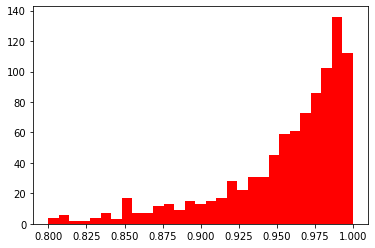

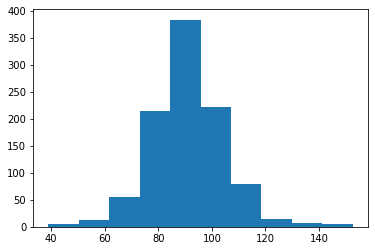

(array([  1.,   5.,  24., 146., 339., 324., 130.,  24.,   4.,   3.]),
 array([-46.50075418, -36.90423181, -27.30770944, -17.71118707,
         -8.11466469,   1.48185768,  11.07838005,  20.67490242,
         30.27142479,  39.86794716,  49.46446954]),
 <a list of 10 Patch objects>)

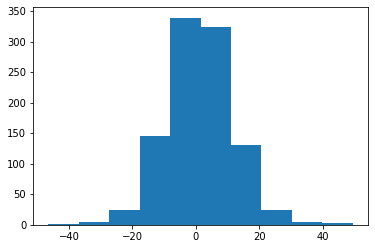

In [86]:
# your code here
scores = []
slope = []
intercept = []
for i in range(1000):
  index = np.random.choice(range(1000),size=5,replace = True)
  X_sample = X[index]
  Y_sample = y[index]
  linreg = LinearRegression().fit(X_sample,Y_sample)
  scores.append(linreg.score(X_sample,Y_sample))
  slope.append(linreg.coef_[0])
  intercept.append(linreg.intercept_)
plt.hist(scores,  bins=np.linspace(0.8, 1, 30),color = 'red')
plt.show()
plt.hist(slope)
plt.show()
plt.hist(intercept)

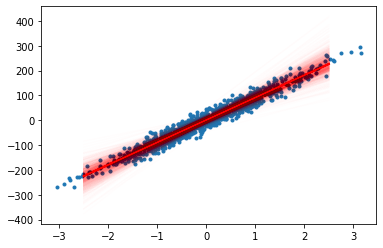

In [91]:
# your code here
plt.plot(X,y,'.')
plt.plot(Xgrid,ypred,linewidth = 2,color = 'red')
for i in range(1000):
  line = lambda x: slope[i]*x + intercept[i]#function to calculate the equation of the line.lambda for inline function
  plt.plot(xgrid,line(xgrid),alpha = 0.007,color = 'red')

In [ ]:
# your code here


## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [78]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [79]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

'Train R2 is 0.9553980956202516, while test R^2 is 0.9388417992889133'

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [80]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

Epoch 1/400
10/10 [==============================] - 0s 1ms/step - loss: 7409.0334 - mae: 68.7192 - accuracy: 0.0000e+00
Epoch 2/400
10/10 [==============================] - 0s 1ms/step - loss: 5589.8776 - mae: 58.6710 - accuracy: 0.0000e+00
Epoch 3/400
10/10 [==============================] - 0s 1ms/step - loss: 3658.0476 - mae: 48.3448 - accuracy: 0.0000e+00
Epoch 4/400
10/10 [==============================] - 0s 1ms/step - loss: 2460.6032 - mae: 39.5781 - accuracy: 0.0000e+00
Epoch 5/400
10/10 [==============================] - 0s 1ms/step - loss: 1741.8272 - mae: 32.9894 - accuracy: 0.0000e+00
Epoch 6/400
10/10 [==============================] - 0s 2ms/step - loss: 1329.8046 - mae: 28.7319 - accuracy: 0.0000e+00
Epoch 7/400
10/10 [==============================] - 0s 1ms/step - loss: 1000.5522 - mae: 25.4422 - accuracy: 0.0000e+00
Epoch 8/400
10/10 [==============================] - 0s 1ms/step - loss: 846.7769 - mae: 23.4504 - accuracy: 0.0000e+00
Epoch 9/400
10/10 [==============

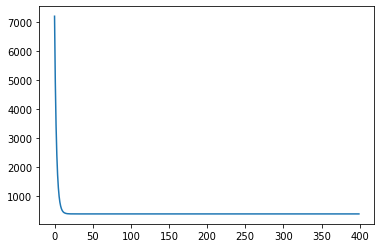

In [82]:
plt.plot(history.history['loss'])

In [ ]:
lr3.get_weights()

### Using the Keras Functional API



In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [ ]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [ ]:
m.get_weights()